In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('BRFSS_cleaned.csv', index_col = 0)

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckup,ExerciseLast30days,SleepTime,HadHeartAttack,HadAngina,...,HeartDisease,RaceEthnicityGroup,AgeGroup5yrs,Height,Weight,BMI,LevelOfSmoker,AlcoholLast30days,DrinkOccasionsPerDay,TestedForHIV
1,Alabama,Female,Excellent,0.0,0.0,Never,No,6.0,No,No,...,No,"White only, non-Hispanic",Age 80 or older,1.60,68.04,26.57,Never smoked,No,0,No
2,Alabama,Female,Very Good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,No,No,...,No,"White only, non-Hispanic",Age 55 to 59,1.57,63.50,25.61,Never smoked,No,0,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,No,No,...,No,"White only, non-Hispanic",NaN,1.65,63.50,23.30,Current smoker - now smokes some days,No,0,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,No,No,...,No,"White only, non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Never smoked,Yes,10,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,Yes,No,...,Yes,"White only, non-Hispanic",Age 80 or older,1.80,84.82,26.08,Never smoked,No,0,No


In [4]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepTime,Height,Weight,BMI,DrinkOccasionsPerDay
count,357410.000000,358782.000000,361689.000000,365242.000000,365242.000000,365242.000000,365242.000000
mean,4.339512,4.408850,7.022912,1.704963,83.277729,28.558440,27.441318
std,8.654613,8.366851,1.472645,0.107164,21.405164,6.549345,97.004734
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000,3.000000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000,27.000000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000,900.000000


Straight out of the box DrinkOccassionsPerDay's max doesn't look right we're going to have to fix that

In [5]:
df['DrinkOccasionsPerDay'] = df['DrinkOccasionsPerDay'].replace(900, np.median(df['DrinkOccasionsPerDay']))

More imputations

In [6]:
df['AgeGroup5yrs'].fillna(df['AgeGroup5yrs'].mode()[0], inplace=True)

In [7]:
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mean(), inplace=True)
df['MentalHealthDays'].fillna(df['MentalHealthDays'].mean(), inplace=True)
df['SleepTime'].fillna(df['SleepTime'].mean(), inplace=True)

# Demographics

Pie chart to show the distribution of heart disease cases in a dataset.

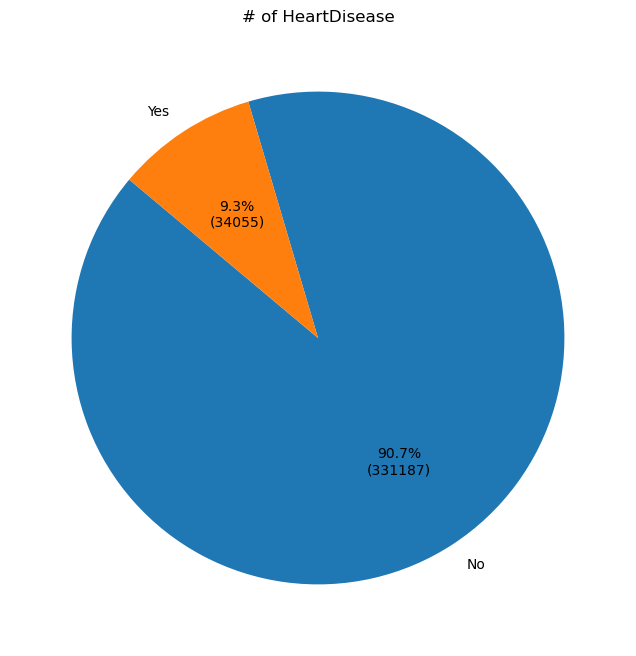

In [8]:
heart_disease_counts = df['HeartDisease'].value_counts()

# Function to display both count and percentage
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct=lambda pct: func(pct, heart_disease_counts), startangle=140)
plt.title('# of HeartDisease')

# Display the pie chart
plt.show()

This code creates a count plot to show the distribution of general health statuses in a dataset, ordering the categories as 'Poor', 'Fair', 'Good', 'Very Good', and 'Excellent'. It labels the axes and title, calculates the total number of cases. It seems like the general concensus is that people feel good/very good

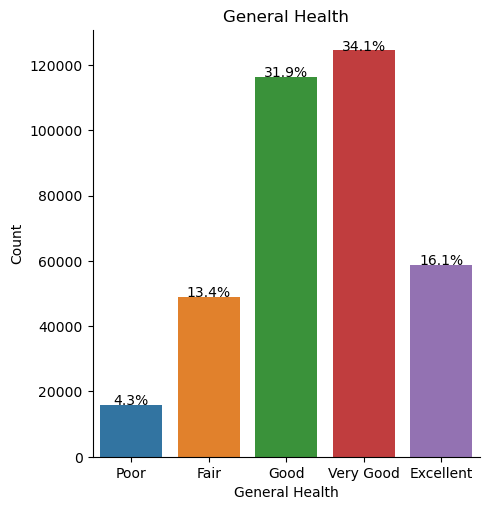

In [9]:
health_order = ['Poor','Fair','Good','Very Good', 'Excellent']
ax = sns.catplot(x= 'GeneralHealth'
           ,kind = 'count'
           ,data = df
           ,order = health_order)
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('General Health')
total_count = len(df)
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.ax.text(x, y, percentage, ha='center')

plt.show()


the general health of People with heart disease seems skewed more to the right

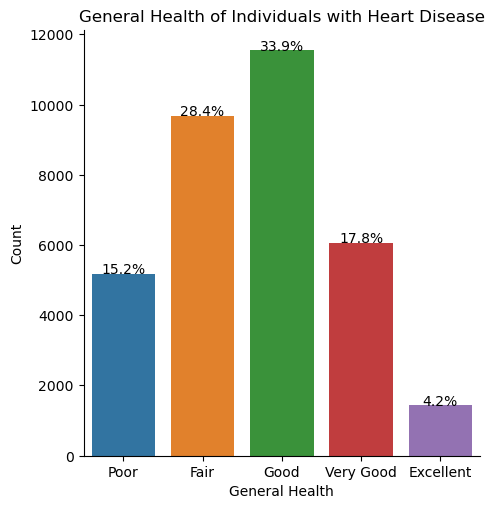

In [10]:
# Filter the DataFrame to include only rows where HeartDisease is 'Yes'
df_yes_heart_disease = df[df['HeartDisease'] == 'Yes']

# Define the order of health categories
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create the count plot for the 'GeneralHealth' column
ax = sns.catplot(x='GeneralHealth',
                 kind='count',
                 data=df_yes_heart_disease,
                 order=health_order)

# Set labels and title
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('General Health of Individuals with Heart Disease')

# Calculate total count of heart disease cases
total_count = len(df_yes_heart_disease)

# Add percentage labels on top of the bars
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.ax.text(x, y, percentage, ha='center')

# Show the plot
plt.show()

Shows and Calculates the percentage of individuals with heart disease for each sex category and visualizes the results in a bar plot. 

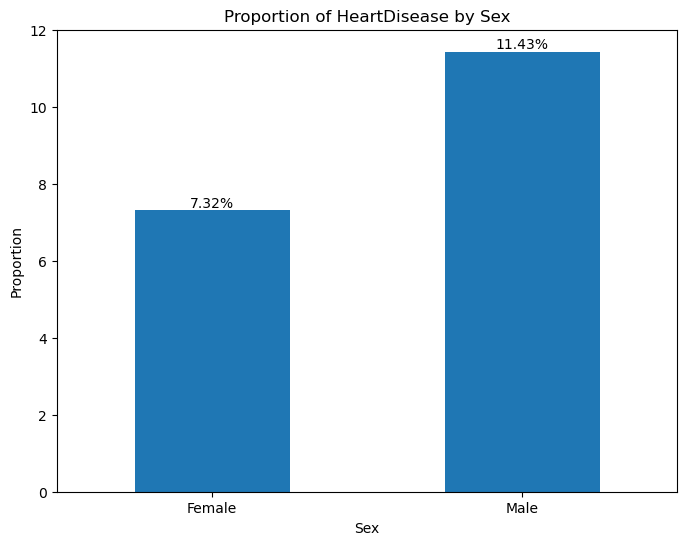

In [11]:
# Calculate the proportions of HeartDisease = 'Yes' for each category of 'Sex'
heart_disease_yes_proportions = df[df['HeartDisease'] == 'Yes'].groupby('Sex').size() / df.groupby('Sex').size() * 100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_yes_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_yes_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

This code filters the dataset to include only those with heart disease and calculates the proportion of these cases for each age group.It makes sense to see that as you get older you are more suspectible to illness including heart disease.

It makes sense that heart attack and angina are linked to heart disease,but it's interesting to see that arthritis is common in those who have heart disease, probably due to age, as seen before in age alot of people with heart diseases are found in age group 60+, which is the same for arthritis patients

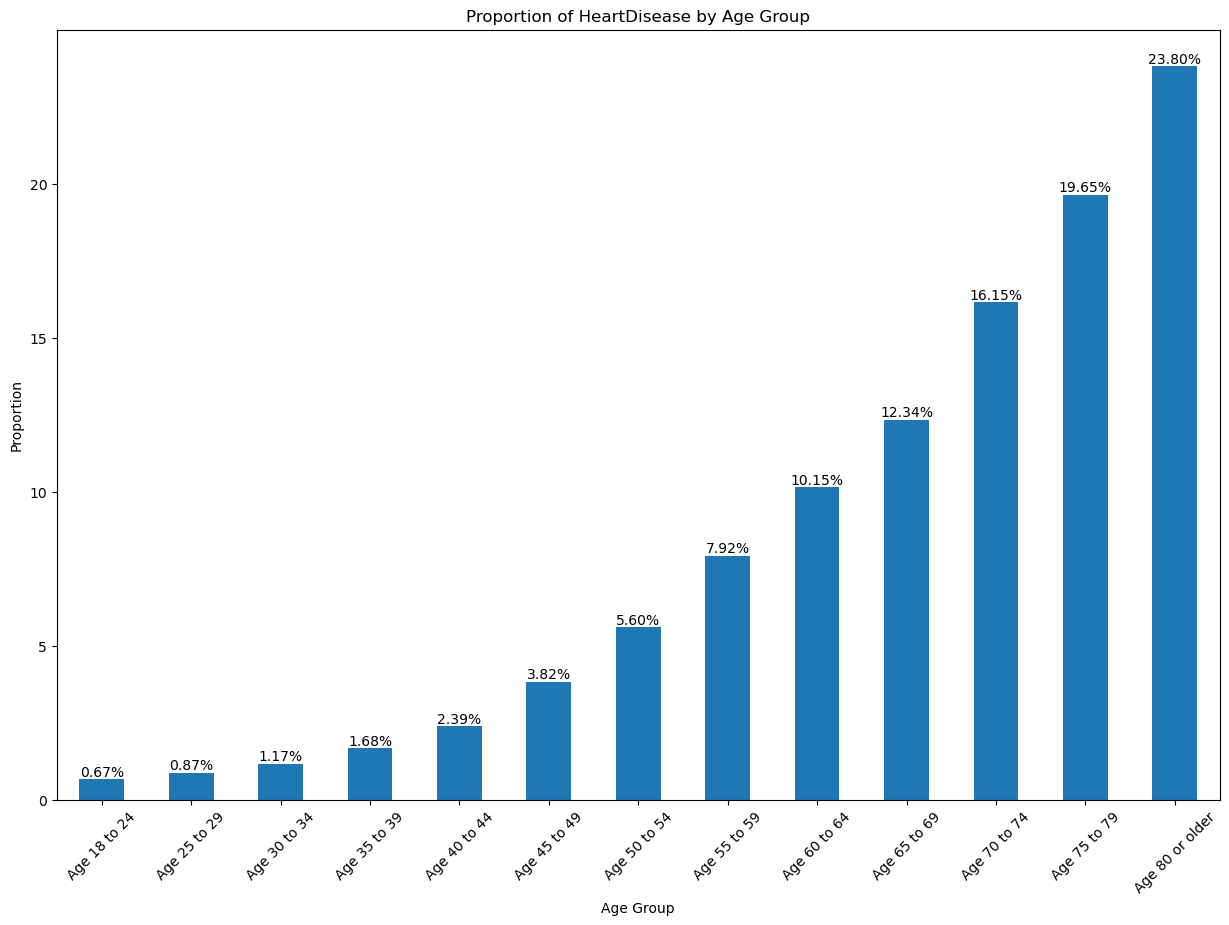

In [12]:
# Filter the DataFrame to include only rows where HeartDisease is 'Yes'
df_yes_heart_disease = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of HeartDisease = 'Yes' for each age group
age_proportions = df_yes_heart_disease.groupby('AgeGroup5yrs').size() / df.groupby('AgeGroup5yrs').size() * 100

# Plot
plt.figure(figsize=(15, 10))
age_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(age_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

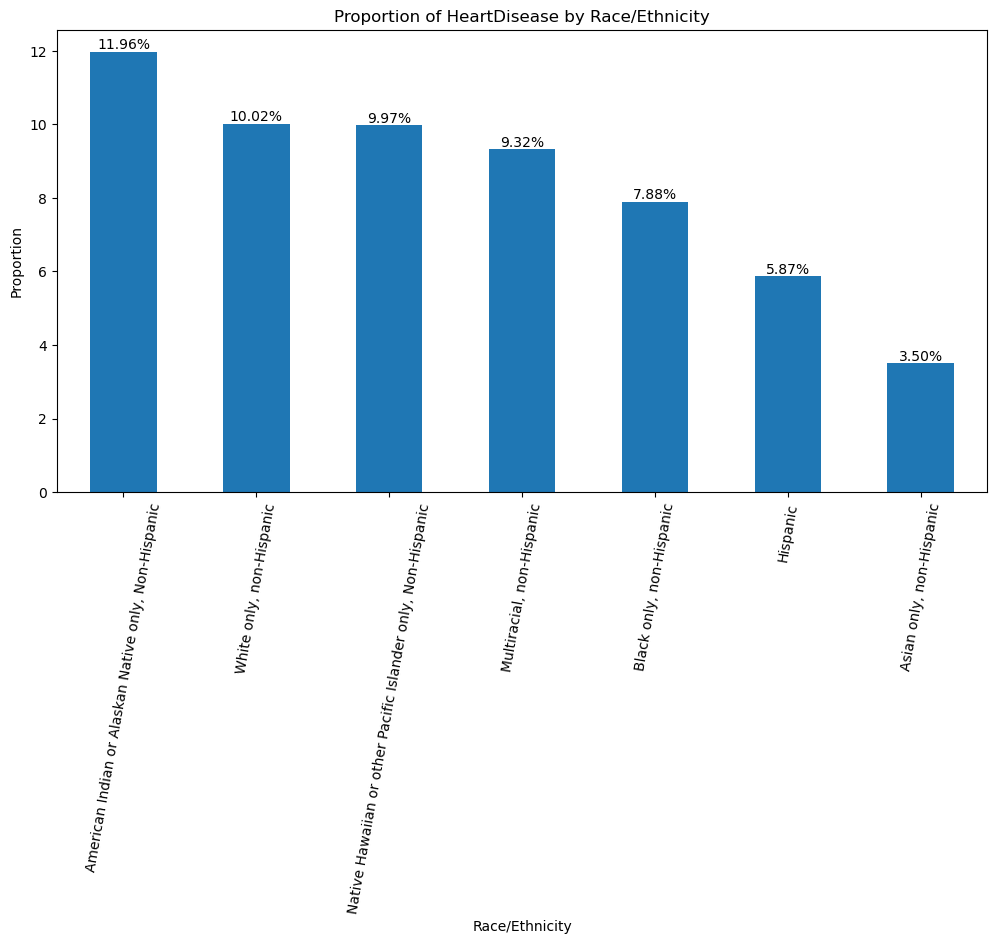

In [13]:
# Calculate the proportions of HeartDisease = 'Yes' for each age group
age_proportions = df_yes_heart_disease.groupby('RaceEthnicityGroup').size() / df.groupby('RaceEthnicityGroup').size() * 100

# Sort the proportions in descending order
age_proportions = age_proportions.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
age_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Proportion')
plt.xticks(rotation=80)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(age_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

# Distribution of comorbidities with Heart Disease

Creating a boolean column for Smokers, whether they smoke or not

In [14]:
df['Smoked'] = df['LevelOfSmoker'].replace(['Current smoker - now smokes some days', 'Former smoker', 'Current smoker - now smokes every day'], 'Smoked')

Examines the relationship between smoking and heart disease using a chi-squared test. It calculates the proportion of heart disease cases among smokers and non-smokers, plots these proportions with error bars, and provides an interpretation based on statistical significance.

Chi-squared test statistic: 4299.504077909051
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[196622.36582569  20231.63417431]
 [132360.63417431  13619.36582569]]


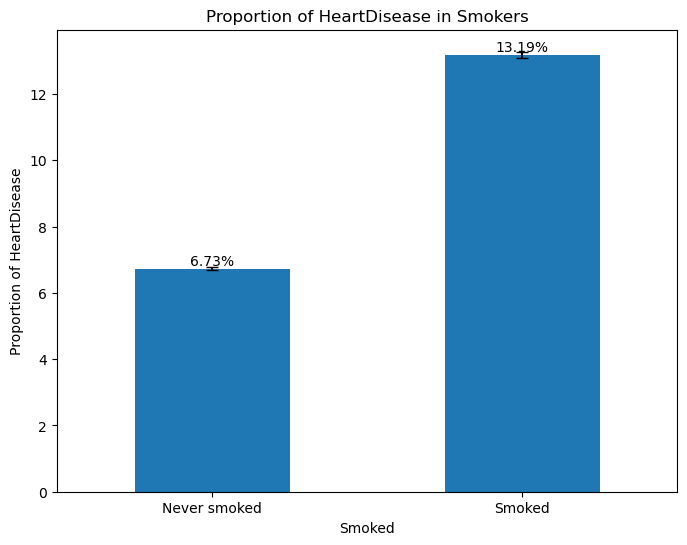

There is a significant association between smoking and heart disease (p < 0.05).


In [15]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Smoked'], df['HeartDisease'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df[df['HeartDisease'] == 'Yes'].groupby('Smoked').size() / df.groupby('Smoked').size() * 100

# Calculate the standard error for the proportions
n_smoked = df.groupby('Smoked').size()
se = np.sqrt(heart_disease_proportions * (100 - heart_disease_proportions) / n_smoked)

# Plot
plt.figure(figsize=(8, 6))
ax = heart_disease_proportions.plot(kind='bar', yerr=se, capsize=4)
plt.title('Proportion of HeartDisease in Smokers')
plt.xlabel('Smoked')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

# Interpretation of the results
if p < 0.05:
    print("There is a significant association between smoking and heart disease (p < 0.05).")
else:
    print("There is no significant association between smoking and heart disease (p >= 0.05).")

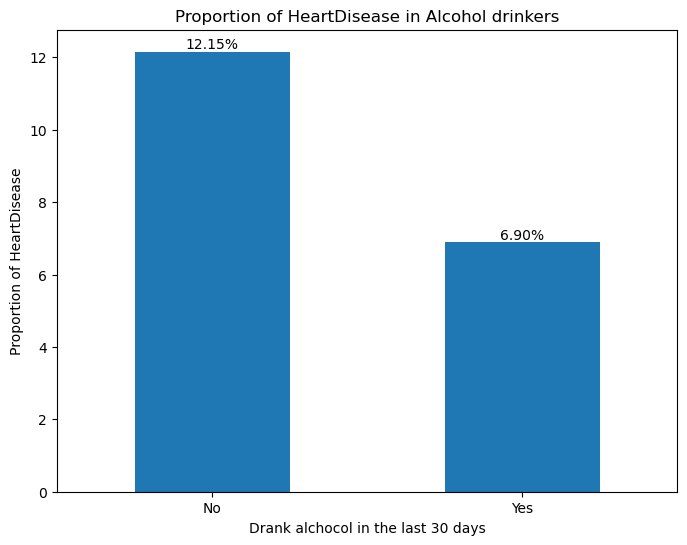

In [16]:
# Filter the DataFrame to include only rows where 'HeartDisease' is 'Yes'
df_heart_disease_yes = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df_heart_disease_yes.groupby('AlcoholLast30days').size() / df.groupby('AlcoholLast30days').size() *100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease in Alcohol drinkers')
plt.xlabel('Drank alchocol in the last 30 days')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

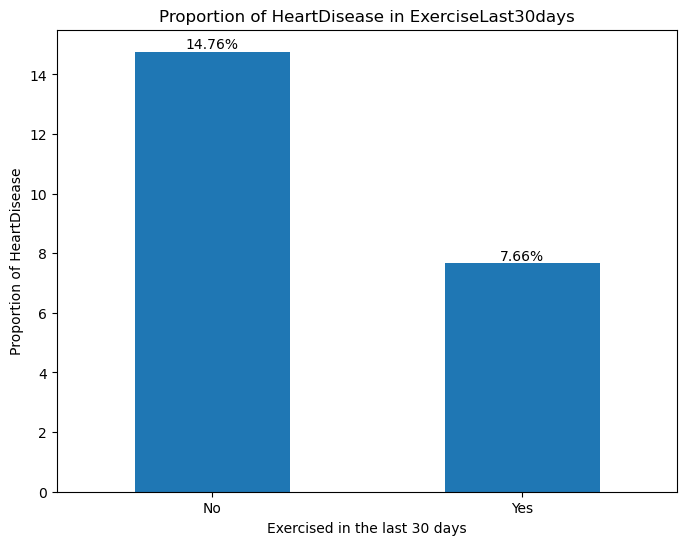

In [17]:
# Filter the DataFrame to include only rows where 'HeartDisease' is 'Yes'
df_heart_disease_yes = df[df['HeartDisease'] == 'Yes']

# Calculate the proportions of 'HeartDisease' for each category of 'Smoked'
heart_disease_proportions = df_heart_disease_yes.groupby('ExerciseLast30days').size() / df.groupby('ExerciseLast30days').size() *100

# Plot
plt.figure(figsize=(8, 6))
heart_disease_proportions.plot(kind='bar')
plt.title('Proportion of HeartDisease in ExerciseLast30days')
plt.xlabel('Exercised in the last 30 days')
plt.ylabel('Proportion of HeartDisease')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numerical values on top of the bars
for i, v in enumerate(heart_disease_proportions):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

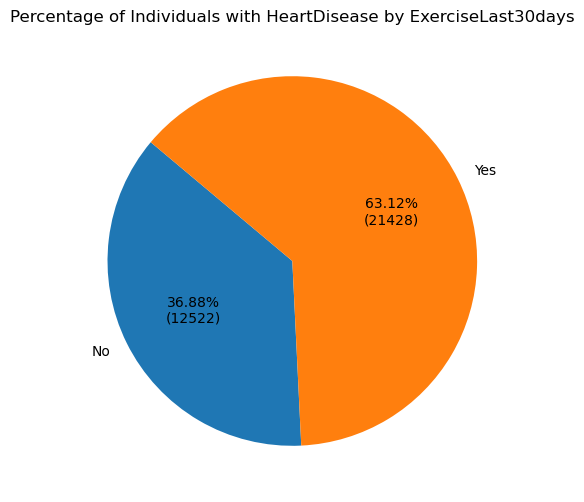

In [18]:
# Calculate the proportions of individuals with HeartDisease by ExerciseLast30days
heart_disease_proportions = df_heart_disease_yes.groupby('ExerciseLast30days').size() / len(df_heart_disease_yes) * 100
heart_disease_counts = df_heart_disease_yes.groupby('ExerciseLast30days').size()

# Function to display both count and percentage
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

# Plot as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_proportions, labels=heart_disease_proportions.index, autopct=lambda pct: func(pct, heart_disease_counts), startangle=140)
plt.title('Percentage of Individuals with HeartDisease by ExerciseLast30days')

# Display the pie chart
plt.show()

### Visualization of Numerical Features

In [19]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepTime,Height,Weight,BMI,DrinkOccasionsPerDay
count,365242.000000,365242.000000,365242.000000,365242.000000,365242.000000,365242.000000,365242.000000
mean,4.339512,4.408850,7.022912,1.704963,83.277729,28.558440,17.391751
std,8.561318,8.292529,1.465465,0.107164,21.405164,6.549345,28.030137
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000,3.000000
75%,4.000000,4.408850,8.000000,1.780000,95.250000,31.750000,20.000000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000,100.000000


In [20]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])


In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,len(x)+1) / n
    
    return x, y

 This visualization helps in analyzing how data values are distributed and accumulated. Computes and plots the empirical cumulative distribution function (ECDF) for each column. It also marks key percentiles (2.5%, 25%, 50%, 75%, 97.5%) on the plots to give a clear view of data distribution. 

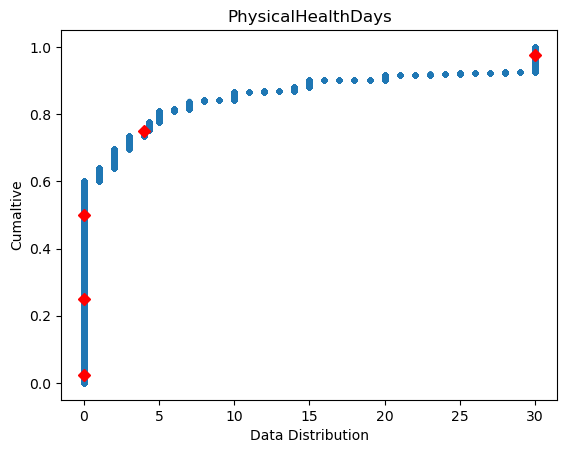

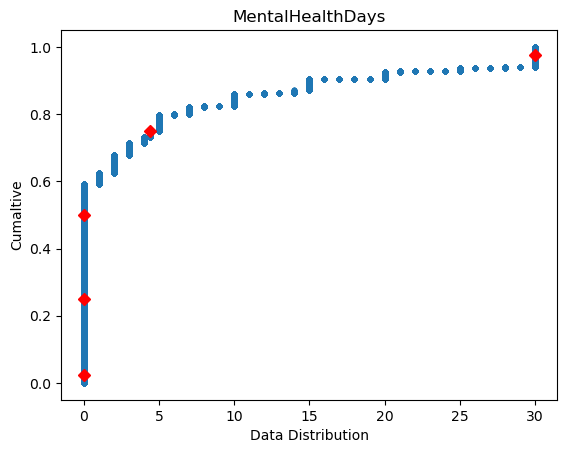

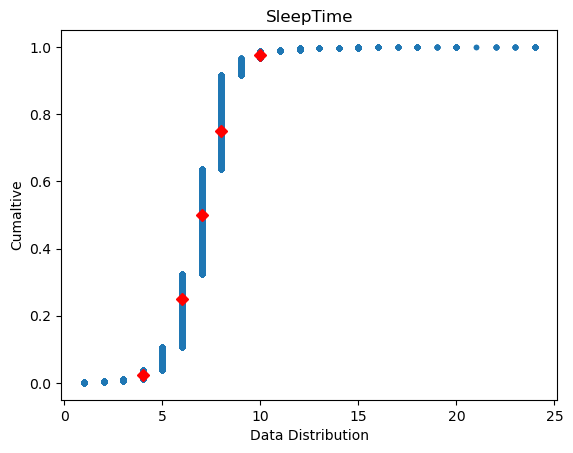

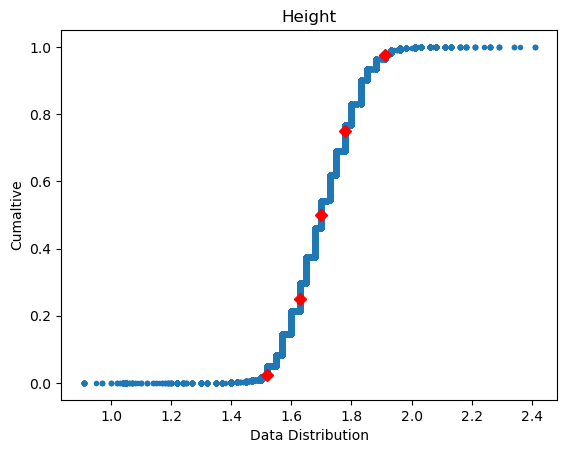

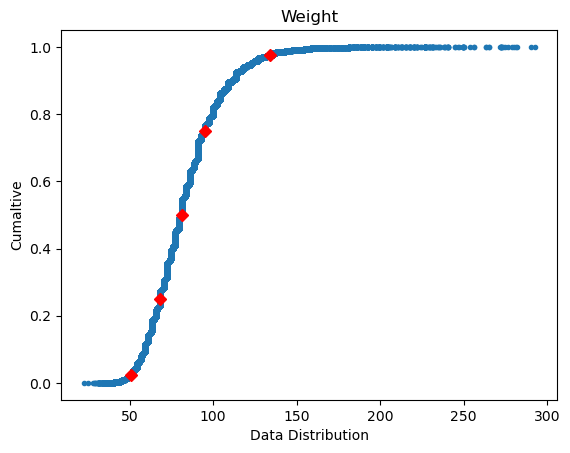

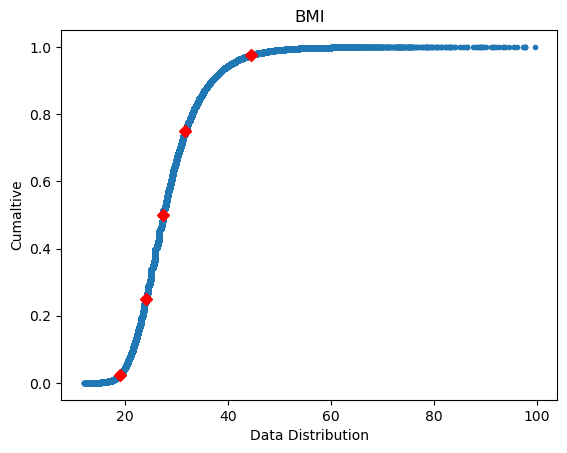

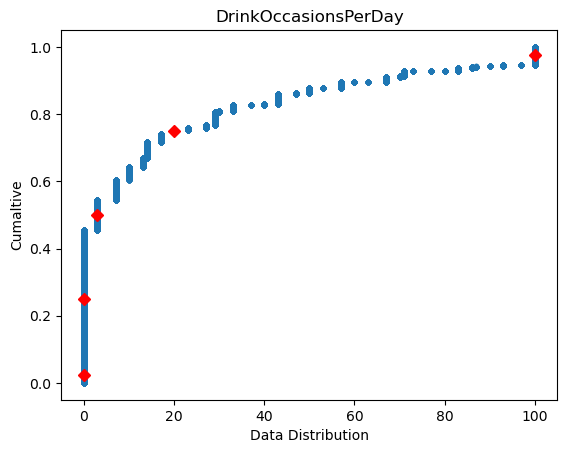

In [22]:
#Select only numeric columns
quantitative_columns = df.select_dtypes(include=['int64', 'float64']).columns
#Plot ecdf for each quantitative column
for col in quantitative_columns:
    x, y = ecdf(df[col])
    percentiles = np.array([2.5, 25, 50, 75, 97.5])
    ptiles = np.percentile(df[col], percentiles)
    
    ax = plt.figure()
    ax = plt.plot(x,y, marker ='.', linestyle = 'none')
    ax = plt.plot(ptiles, percentiles/100, marker='D', color='red',
         linestyle='none')
    ax = plt.xlabel('Data Distribution')
    ax = plt.ylabel('Cumaltive')
    ax = plt.title (col)
    ax = plt.margins =(0.02)
    plt.show()


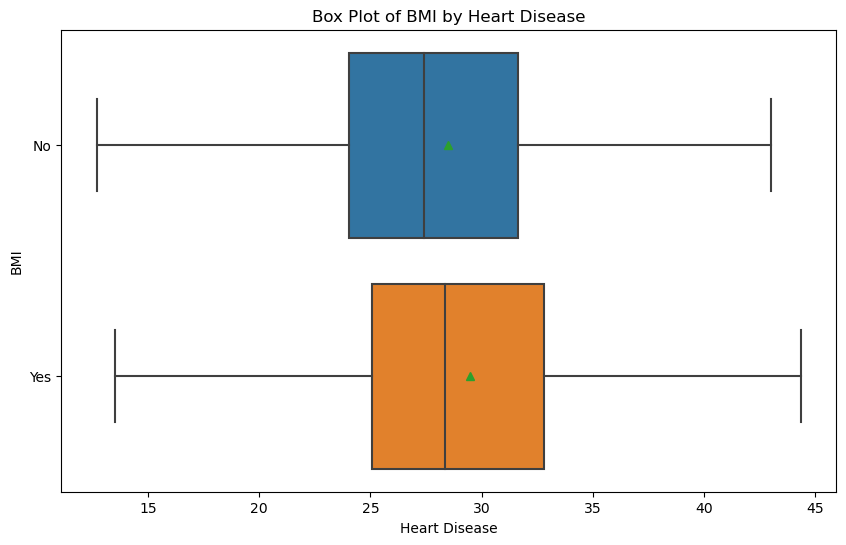

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='HeartDisease', x='BMI', data=df, showfliers=False, showmeans = True)
plt.title('Box Plot of BMI by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

Individuals with heart disease have a slightly higher average BMI compared to those without it. Both groups show similar variability in BMI. The range are fairly similar. However, people with heart disease generally have higher BMI values, with their median and quartiles also being somewhat elevated compared to those without heart disease. This suggests that higher BMI is somewhat associated with the presence of heart disease.

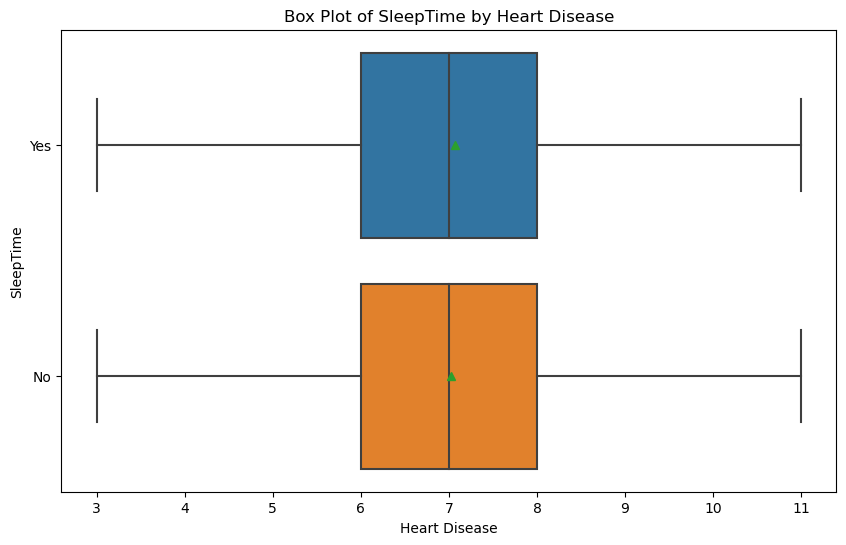

In [24]:
# Plot a box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='HeartDisease', x='SleepTime', data=df, showfliers= False, showmeans = True, order = ['Yes', 'No'])
plt.title('Box Plot of SleepTime by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('SleepTime')
plt.show()

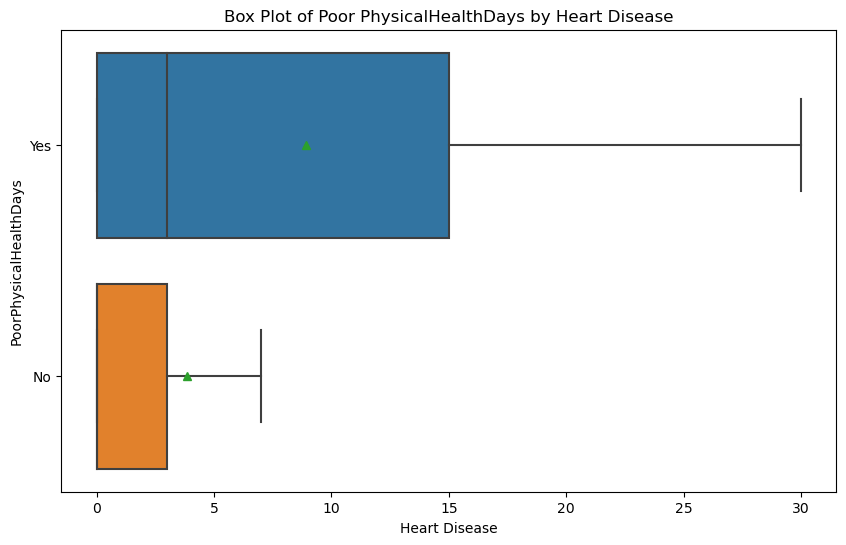

In [26]:
# Plot a box plot without outliers

plt.figure(figsize=(10, 6))
sns.boxplot(y='HeartDisease', x='PhysicalHealthDays', data=df, showfliers= False, showmeans =True, order =['Yes', 'No'])
plt.title('Box Plot of Poor PhysicalHealthDays by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('PoorPhysicalHealthDays')
plt.show()

## Correlation Matrix 

In [28]:
df['Smoked'] = df['Smoked'].map({'Smoked': 1, 'Never smoked': 0})

In [29]:
# List of columns to encode
columns_to_encode = df.columns[df.nunique() == 2].tolist()

exclude_col = ['Sex','isObese','Smoked']

columns_to_encode = [i for i in columns_to_encode if i not in exclude_col]
# Loop through each column and apply mapping
for column in columns_to_encode:
    # Convert 'Yes' to 1 and 'No' to 0
    df[column] = df[column].map({'Yes': 1, 'No': 0})




In [31]:
continous_columns = ['PhysicalHealthDays','MentalHealthDays', 'SleepTime','Height','Weight','BMI', 'DrinkOccasionsPerDay','HeartDisease']
df_continuous = df[continous_columns].copy()
categorical_columns = ['State','Sex','GeneralHealth','ExerciseLast30days','HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
                    'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','Deaf','Blind','DifficultyConcentrating',
                    'DifficultyWalking','DifficultyDressingOrBathing','DifficultyAloneErrands','EcigUsage','HadChestScan','FluShotLast12Months',
                    'HadPneumoniaShot','HadTetanusShot','HIVRisk','HadCovid','HeartDisease','RaceEthnicityGroup','AgeGroup5yrs','LevelOfSmoker',
                    'AlcoholLast30days','TestedForHIV' , 'Smoked']
df_categorical = df[categorical_columns].copy()

In [ ]:
# Calculate correlation matrix for continuous variables
correlation_continuous = df_continuous.corr()

# Plot correlation matrix for continuous variables
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.heatmap(correlation_continuous, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Matrix for Continuous Variables')
plt.show()

# Display the correlation matrix as a table
print("Correlation Matrix for Continuous Variables:")
print(correlation_continuous)


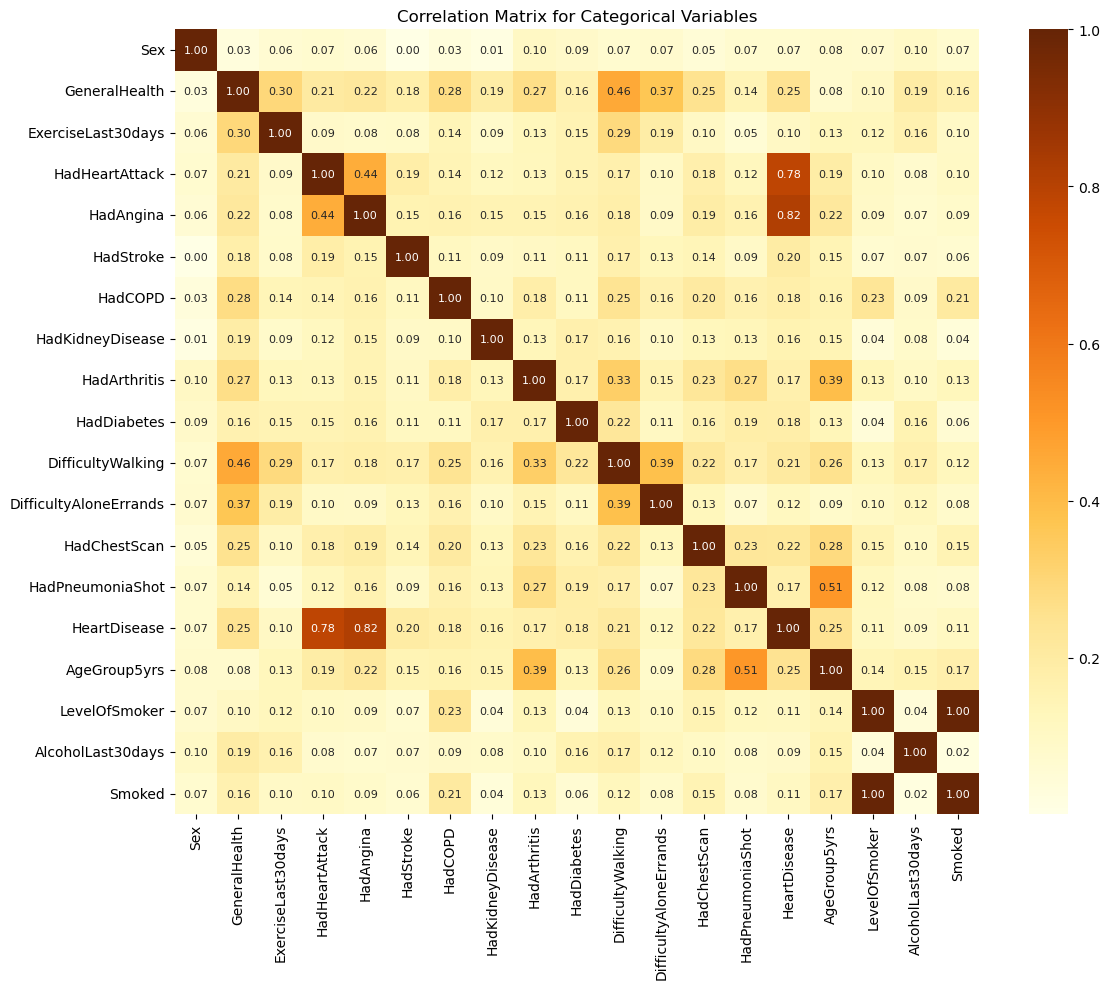

In [33]:
# Define the function for Cramer's V correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, ex = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

# List of categorical columns
categorical_columns = df_categorical.columns

# Initialize an empty DataFrame to store Cramer's V correlations
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute Cramer's V for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# List of columns to drop
columns_to_drop = ['State','HadAsthma','HadSkinCancer','Deaf', 'Blind', 'EcigUsage','HadTetanusShot','HIVRisk','HadCovid', 'HadDepressiveDisorder', 'DifficultyConcentrating','TestedForHIV','RaceEthnicityGroup', 'DifficultyDressingOrBathing','FluShotLast12Months']  # Replace with the actual column names you want to remove

# Drop the specified columns from the matrix
cramers_v_matrix = cramers_v_matrix.drop(columns=columns_to_drop, index=columns_to_drop)

# Plot correlation matrix for categorical variables
plt.figure(figsize=(12, 10))  # Adjusted size for clarity
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='YlOrBr', fmt=".2f",annot_kws={"size": 8})
plt.title('Correlation Matrix for Categorical Variables')
plt.tight_layout()
plt.show()

#print("Correlation Matrix for Categorical Variables:")
#print(cramers_v_matrix.astype(float))

In [ ]:
columns_to_encode # we need to exclude sex and isObese

In [34]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Replace with your actual column names

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns with numerical labels
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the modified DataFrame
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckup,ExerciseLast30days,SleepTime,HadHeartAttack,HadAngina,...,RaceEthnicityGroup,AgeGroup5yrs,Height,Weight,BMI,LevelOfSmoker,AlcoholLast30days,DrinkOccasionsPerDay,TestedForHIV,Smoked
1,0,0,0,0.0,0.0,1,0.0,6.0,0.0,0.0,...,6,12,1.60,68.04,26.57,3,0.0,0,0.0,0.0
2,0,0,4,2.0,3.0,4,1.0,5.0,0.0,0.0,...,6,7,1.57,63.50,25.61,3,0.0,0,0.0,0.0
3,0,0,0,0.0,0.0,4,1.0,7.0,0.0,0.0,...,6,9,1.65,63.50,23.30,1,0.0,0,0.0,1.0
4,0,0,1,2.0,0.0,4,1.0,9.0,0.0,0.0,...,6,4,1.57,53.98,21.77,3,1.0,10,0.0,0.0
5,0,1,3,1.0,0.0,4,0.0,7.0,1.0,0.0,...,6,12,1.80,84.82,26.08,3,0.0,0,0.0,0.0


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'features' and 'target' with your actual feature matrix and target variable
dropped_columns = ['HeartDisease']
X = df.drop(columns=dropped_columns)  # Drop the target column from the features
y = df['HeartDisease']

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')  # or 'median', 'most_frequent' depending on your preference

# Fit the imputer to your data and transform it
X_imputed = imputer.fit_transform(X)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X_imputed, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df.head())

           Feature  Importance
9        HadAngina    0.459801
8   HadHeartAttack    0.417414
32    AgeGroup5yrs    0.013721
25    HadChestScan    0.013298
10       HadStroke    0.009718


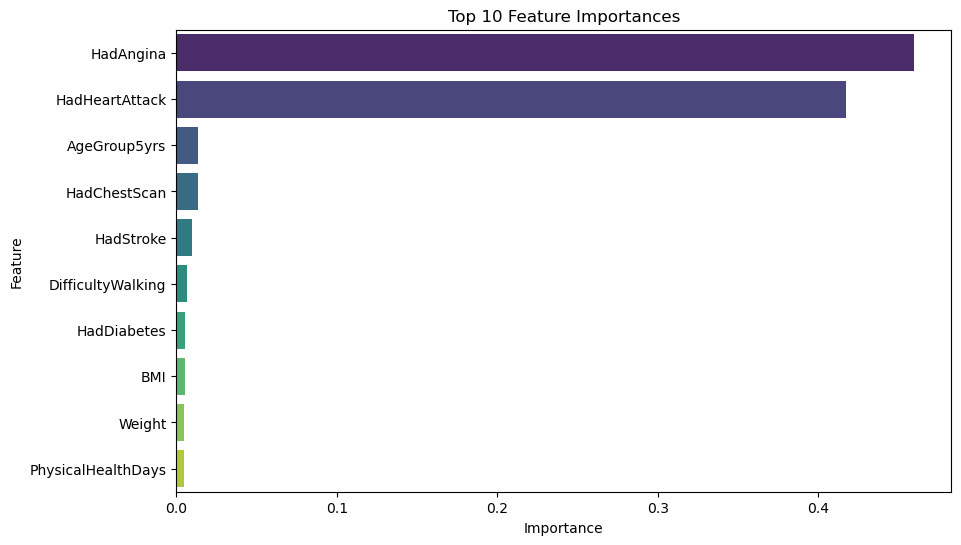

In [36]:
# Sort the features by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = sorted_feature_importance_df.head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')  # Use sns.barplot for better aesthetics
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

we can test features during the modelling, for now we can leave everything in for EDA 

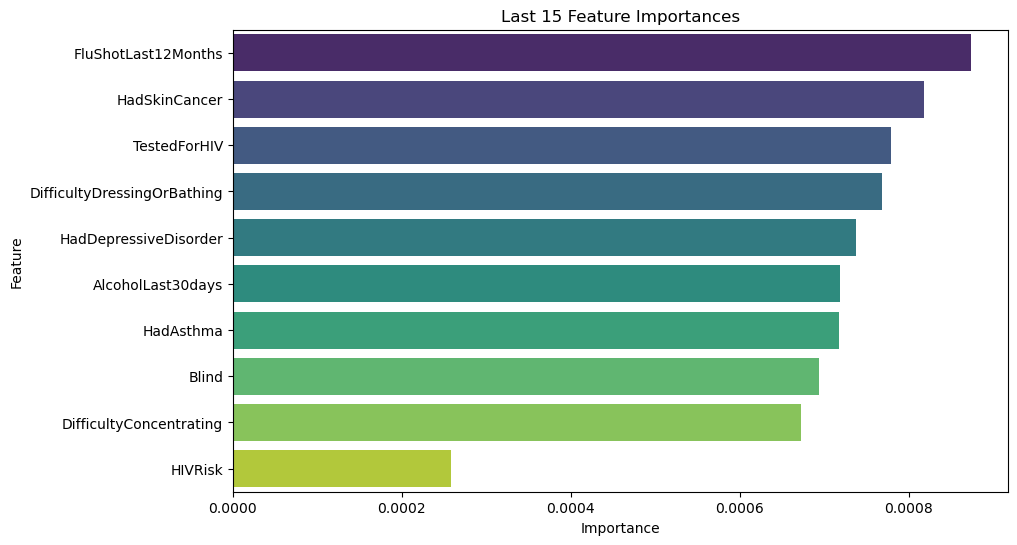

In [39]:
# Sort the features by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
last_10_features = sorted_feature_importance_df.tail(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=last_10_features, palette='viridis')  # Use sns.barplot for better aesthetics
plt.title('Last 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()